        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]
traing: (160, 1)
traing: (40, 1)
intercept:, 7.0071
slope: , 0.0555 
Regression Equation: y = 7.01 + 0.06 * x


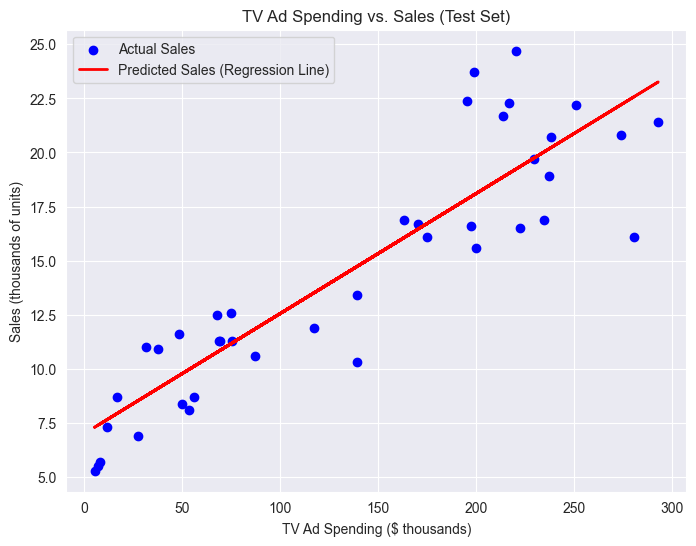

6.101072906773963
<class 'float'>
RMSE: 2.4700


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For building the model
from sklearn.model_selection import train_test_split # train data tikyi validate data tikyi bedann
from sklearn.linear_model import LinearRegression

# Calculate RMSE
from sklearn.metrics import mean_squared_error
import numpy as np


sns.set_style('darkgrid')


df = pd.read_csv('advertising - advertising.csv') 

print(df)

X = df[['TV']]
y = df['Sales']   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("traing:", X_train.shape)
print("traing:",X_test.shape)


# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Get model parameters
intercept = model.intercept_
slope = model.coef_[0]

print(f"intercept:, {intercept:.4f}")
print(f"slope: , {slope:.4f} ")
print(f"Regression Equation: y = {intercept:.2f} + {slope:.2f} * x")

# Plot the regression line on the test data
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.plot(X_test, model.predict(X_test), color='red', linewidth=2, label='Predicted Sales (Regression Line)')
plt.title('TV Ad Spending vs. Sales (Test Set)')
plt.xlabel('TV Ad Spending ($ thousands)')
plt.ylabel('Sales (thousands of units)')
plt.legend()
plt.show()


# Predict on test data
y_pred = model.predict(X_test)

#calculate evaluation value
mse = mean_squared_error(y_test, y_pred)
print(mse)
print(type(mse))
rmse = np.sqrt(mse)

print(f"RMSE: {rmse:.4f}")


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For building the model
from sklearn.model_selection import train_test_split # train data tikyi validate data tikyi bedann
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

from sklearn.metrics import mean_squared_error
import numpy as np

sns.set_style('darkgrid')


df = pd.read_csv('advertising - advertising.csv') 

print(df)

X = df[['TV']]
y = df['Sales']   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("traing:", X_train.shape)
print("traing:",X_test.shape)


#3. scale the features
# features 2k kt wada wadiyen tiyeddi scal 2k tiyenkot scal ekkt gnn use krnw
# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


#4 create and train the
#min cla the using to gradial deserte alogorithom using
#max_iter is the number of passes over the trainging data (epochs)
#tol is the stopping criton 

# Create and train the SGDRegressor
sgd_model = SGDRegressor(max_iter=5000, tol=1e-3, random_state=42)
sgd_model.fit(X_train_scaled, y_train)

#Access the coefficients
intercept_value = sgd_model.intercept_

print(f"Intercept:{intercept_value[0]:.4f}")

#Access the coefficients
cofficients = sgd_model.coef_

print(f"Cofficients:{cofficients[0]:.4f}")

#predict on test data
y_pred = sgd_model.predict(X_test_scaled)

#Calculate MSE
mse = mean_squared_error(y_test,y_pred)

#calculate RMSE

rmse = np.sqrt(mse)

print(f"RMSE:{rmse:.4f}")

#large scal data traid krnn use krnw hrim walue ek enne 


        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]
traing: (160, 1)
traing: (40, 1)
Intercept:15.3101
Cofficients:4.6634
RMSE:2.4687


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
Intercept: [4.7141264]
Coefficients: [0.05450927 0.00433665 0.10094536]


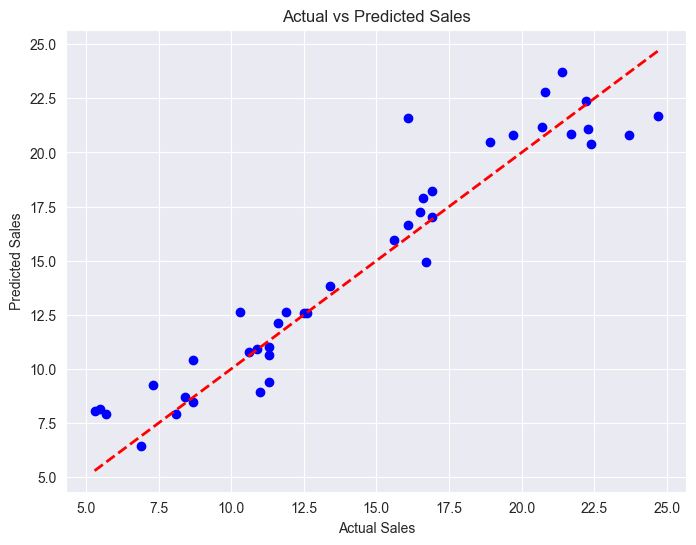


Mean Squared Error (MSE): 2.9078
Root Mean Squared Error (RMSE): 1.7052


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For building the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set style for seaborn
sns.set_style('darkgrid')  

# Load dataset
df = pd.read_csv('advertising - advertising.csv')
print(df.head()) 

# Use corrected column names
X = df[['TV', 'Newspaper', 'Radio']]  
y = df[['Sales']]  

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get model parameters
intercept = model.intercept_
slope = model.coef_[0]

# Print model parameters
print("Intercept:", intercept)
print("Coefficients:", slope)

# Make predictions
predictions = model.predict(X_test)

# Plot predicted vs actual sales
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

# --- Calculate MSE and RMSE ---
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5

print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
